In [1]:
from sympy import *
init_printing()

In [2]:
phi1, phi2, phi3, theta, R, rho, D, k, l_12, l_13, l_23, l_0, m, b = symbols([r'\varphi_1', r'\varphi_2', r'\varphi_3', r'\theta', 'R', r'\rho', 'D','k', r'l_{12}', r'l_{13}',r'l_{23}', r'l_0', 'm', r'\beta'])
dphi1, dphi2, dphi3, dtheta = symbols([r'\dot{\varphi}_1', r'\dot{\varphi}_2', r'\dot{\varphi}_3', r'\dot{\theta}'])

# Modell először 3 golyóra

## A Lagrange-fv: $L=K-V$

### $K=K_{b} + K_{k}$

### $V=V_{b}+V_{k}$

$K_{b} = \frac{1}{2}mR^{2}(\dot{\varphi_{1}}^{2} +\dot{ \varphi_{2}}^{2} +\dot{ \varphi_{3}}^{2})$

$K_{k} = \frac{1}{2}m \rho^{2} \dot{\theta}^{2}$

$V_{b}=\frac{1}{2} k  \left [ (l_{0}-l_{12})^{2} + (l_{0}-l_{23})^{2} + (l_{0}-l_{13})^{2} \right ]$

$V_{k} = k \left [ e^{-\beta r_{1}} + e^{-\beta r_{2}} + e^{-\beta r_{3}} \right ]$



A rugók hossza: (és $l_0$ a nyugalmi)

In [3]:
l_12 = sqrt(2) * R * sqrt(1 - cos(phi2 - phi1))
l_13 = sqrt(2) * R * sqrt(1 - cos(phi3 - phi1))
l_23 = sqrt(2) * R * sqrt(1 - cos(phi2 - phi3))

Kölcsönhatás benti golyók között:

In [4]:
V_b = 1/2 * D * ((l_0-l_12)**2 + (l_0-l_23)**2 + (l_0-l_13)**2)

In [5]:
#V_b= 1/2 * D * (3*l**2 + 4*R**2*((sin((phi2-phi1)/(2)))**2 + (sin((phi3-phi2)/(2)))**2 + (sin((phi1-phi3)/(2)))**2) - 4*R*l*(sin((phi2-phi1)/(2)) + sin((phi3-phi2)/(2)) + sin((phi1-phi3)/(2))))

A távolságok:

In [6]:
r1=sqrt(R**2 + rho**2 - 2*R*rho*cos(theta-phi1))
r2=sqrt(R**2 + rho**2 - 2*R*rho*cos(theta-phi2))
r3=sqrt(R**2 + rho**2 - 2*R*rho*cos(theta-phi3))

Kölcsönhatás a külső golyóval:

In [7]:
V_k= k * (exp(-b*r1) + exp(-b*r2) + exp(-b*r3))

Teljes $V$ és $K$ :

In [8]:
V = V_b + V_k

In [9]:
V

In [10]:
K= 1/2 * m * ( R**2 * (dphi1**2 + dphi2**2 + dphi3**2) + rho**2 * (dtheta**2))

$L$:

In [11]:
L= K - V

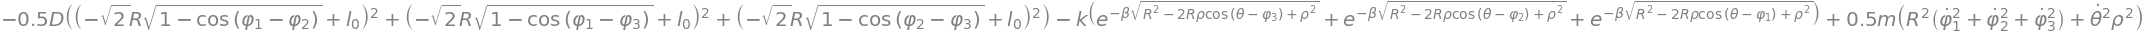

In [12]:
L

# Euler- Lagrange:

$\frac{\partial L}{\partial q_{i}} - \mathrm{\frac{d}{dt}}\frac{\partial L}{\partial \dot{q_{i}}} = 0$

## Most:

$\frac{\partial L}{\partial \varphi_{n}} - \mathrm{\frac{d}{dt}}\frac{\partial L}{\partial \dot{\varphi_{n}}} = 0$

$\frac{\partial L}{\partial \theta} - \mathrm{\frac{d}{dt}}\frac{\partial L}{\partial \dot{\theta}} = 0$


### n = 1,2,3 -ra: 

### $\frac{\partial L}{\partial q_{i}}=...$

In [13]:
egyes=simplify(diff(L,phi1))
kettes=simplify(diff(L,phi2))
harmas=simplify(diff(L,phi3))
kinti=simplify(diff(L,theta))

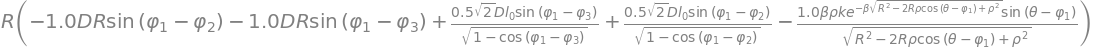

In [14]:
egyes

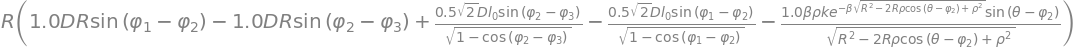

In [15]:
kettes

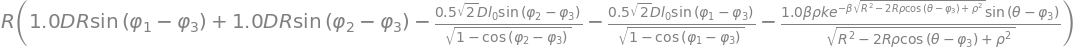

In [16]:
harmas

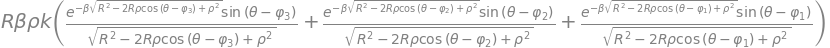

In [17]:
kinti

## $\mathrm{\frac{d}{dt}}\frac{\partial L}{\partial \dot{q_{i}}}:$

$\mathrm{\frac{d}{dt}}\frac{\partial L}{\partial \dot{\varphi_{n}}} = mR^{2}\ddot{\varphi}_{n}$

$\mathrm{\frac{d}{dt}}\frac{\partial L}{\partial \dot{\theta}} = m \rho^{2} \ddot{\theta}$

## A megoldandó diffegyenletek (N golyó):

$\ddot{\varphi}_{n}= \frac{d}{mR}\left [ R \sin(\varphi_{n-1}-\varphi_{n}) -
                       R\sin(\varphi_{n}-\varphi_{n-1}) + \frac{
                      \sqrt{2}l_{0}\sin(\varphi_{n} - \varphi_{n+1})}{2\sqrt{1-\cos(\varphi_{n}-\varphi_{n+1})}} -
                      \frac{
                      \sqrt{2}l_{0}\sin(\varphi_{n-1} - \varphi_{n})}{2\sqrt{1-\cos(\varphi_{n-1}-\varphi_{n})}}  -
                       \frac{\rho k \beta}{d} \frac{e^{ -\beta \sqrt{R^{2} - 2R \rho \cos(\theta - \varphi_{n})+\rho^{2}}}\sin(\theta - \varphi_{n})} {\sqrt{R^{2} - 2R\rho \cos(\theta - \varphi_{n}) + \rho^{2}}} \right ]$
                       
$\ddot {\theta} = \frac{R k \beta}{m \rho} \sum_{n}^{N} \left [ \frac{e^{ -\beta \sqrt{R^{2} - 2R \rho \cos(\theta - \varphi_{n})+\rho^{2}}}\sin(\theta - \varphi_{n})} {\sqrt{R^{2} - 2R\rho \cos(\theta - \varphi_{n}) + \rho^{2}}} \right ]$

### $\beta$ értéke?

$n=e^{-\beta (R+\rho)}$

$\mathrm{ln}(n) = -\beta (R+\rho)$

$\beta = \frac{-\mathrm{ln}(n)}{ (R+\rho)}$